In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [3]:
print("train data:", 'images:', x_img_train.shape, " labels: ", y_label_train.shape)
print("test  data:", 'images:', x_img_test.shape,  " labels: ", y_label_test.shape)

train data: images: (50000, 32, 32, 3)  labels:  (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels:  (10000, 1)


In [4]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize  = x_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters = 32, kernel_size = (3, 3),
                 input_shape = (32, 32, 3), activation = 'relu',
                 padding = 'same'))

model.add(Dropout(0.3))

model.add(Conv2D(filters = 32, kernel_size = (3, 3),
                 activation = 'relu', padding = 'same'))

model.add(MaxPooling2D(pool_size = (2, 2)))

In [9]:
model.add(Conv2D(filters = 64, kernel_size = (3, 3),
                 activation = 'relu', padding = 'same'))

model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3, 3),
                 activation = 'relu', padding = 'same'))

model.add(MaxPooling2D(pool_size = (2, 2)))

In [10]:
model.add(Conv2D(filters = 128, kernel_size = (3, 3),
                 activation = 'relu', padding = 'same'))

model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3, 3),
                 activation = 'relu', padding = 'same'))

model.add(MaxPooling2D(pool_size = (2, 2)))

In [11]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
train_history = model.fit(x_img_train_normalize, 
                          y_label_train_OneHot,
                          validation_split = 0.2,
                          epochs = 5,
                          batch_size = 128,
                          verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 313s 8ms/step - loss: 1.5316 - acc: 0.4340 - val_loss: 1.3713 - val_acc: 0.5053
Epoch 2/5
40000/40000 [==============================] - 330s 8ms/step - loss: 1.2528 - acc: 0.5455 - val_loss: 1.1466 - val_acc: 0.5931
Epoch 3/5
40000/40000 [==============================] - 325s 8ms/step - loss: 1.0906 - acc: 0.6109 - val_loss: 1.0514 - val_acc: 0.6237
Epoch 4/5
40000/40000 [==============================] - 319s 8ms/step - loss: 0.9709 - acc: 0.6559 - val_loss: 0.9181 - val_acc: 0.6801
Epoch 5/5
40000/40000 [==============================] - 344s 9ms/step - loss: 0.8859 - acc: 0.6856 - val_loss: 0.9164 - val_acc: 0.6860


In [18]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose=0)
scores[1]

0.6779

In [19]:
import matplotlib.pyplot as plt
def show_train_history(train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

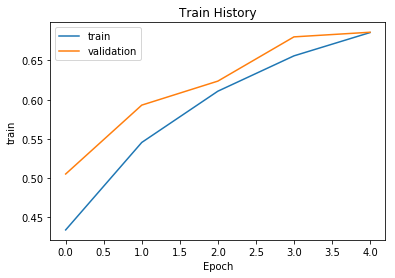

In [20]:
show_train_history('acc', 'val_acc')

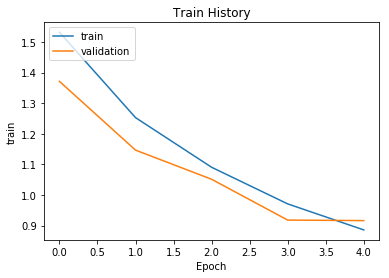

In [21]:
show_train_history('loss', 'val_loss')

In [22]:
prediction = model.predict_classes(x_img_test_normalize)

In [23]:
prediction[:10]

array([3, 8, 8, 0, 4, 6, 5, 2, 3, 9], dtype=int64)

In [45]:
label_dict = {0: "airplane", 
              1: "automobile", 
              2: "bird",
              3: "cat",
              4: "deer",
              5: "dog",
              6: "frog",
              7: "horse",
              8: "ship",
              9: "truck"
              }

In [48]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap = 'binary')
        
        title = str(i) + ', ' + label_dict[labels[i][0]]
        if len(prediction) > 0:
            title += ' => ' + label_dict[prediction[i]]
            
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

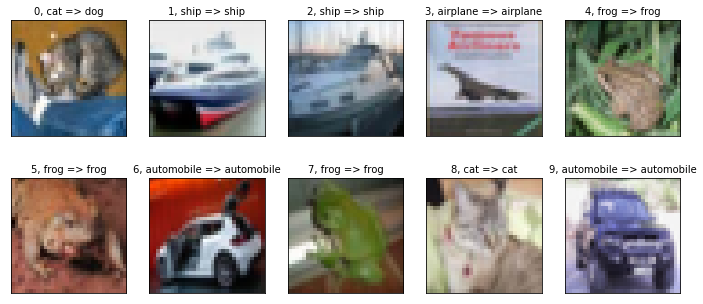

In [49]:
plot_images_labels_prediction(x_img_test, y_label_test, prediction, 0, 10)

In [56]:
Predicted_Probability = model.predict(x_img_test_normalize)

In [59]:
def show_Predicted_Probability(y, prediction, x_img, Predicted_Probability, i):
    print('label:', label_dict[y[i][0]],
        'predict:', label_dict[prediction[i]])
    plt.figure(figsize = (2,2))
    plt.imshow(np.reshape(x_img_test[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j] + ' Probability: %1.9f'%(Predicted_Probability[i][j]))

label: cat predict: dog


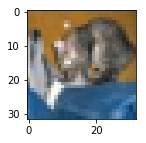

airplane Probability: 0.003880344
automobile Probability: 0.004935734
bird Probability: 0.007509173
cat Probability: 0.348187715
deer Probability: 0.013078793
dog Probability: 0.573654890
frog Probability: 0.020960521
horse Probability: 0.012428781
ship Probability: 0.014195538
truck Probability: 0.001168493


In [60]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability, 0)

label: airplane predict: airplane


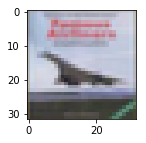

airplane Probability: 0.807062924
automobile Probability: 0.000777775
bird Probability: 0.022156334
cat Probability: 0.000850088
deer Probability: 0.004107903
dog Probability: 0.000014331
frog Probability: 0.000051115
horse Probability: 0.000031307
ship Probability: 0.163828686
truck Probability: 0.001119589


In [61]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability, 3)

In [62]:
prediction.shape

(10000,)

In [63]:
y_label_test.shape

(10000, 1)

In [64]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [66]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1), prediction, rownames=['label'], colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,795,10,55,15,15,13,13,7,46,31
1,14,818,12,12,5,6,16,5,20,92
2,53,2,641,26,86,71,89,17,9,6
3,20,10,69,476,59,214,110,25,5,12
4,21,2,77,44,720,28,73,26,8,1
5,14,0,50,112,35,698,54,29,4,4
6,3,1,32,29,17,21,884,5,5,3
7,16,1,40,20,80,77,12,745,3,6
8,54,24,24,12,10,10,15,3,820,28


In [67]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1), prediction, rownames = ['label'], colnames = ['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,795,10,55,15,15,13,13,7,46,31
1,14,818,12,12,5,6,16,5,20,92
2,53,2,641,26,86,71,89,17,9,6
3,20,10,69,476,59,214,110,25,5,12
4,21,2,77,44,720,28,73,26,8,1
5,14,0,50,112,35,698,54,29,4,4
6,3,1,32,29,17,21,884,5,5,3
7,16,1,40,20,80,77,12,745,3,6
8,54,24,24,12,10,10,15,3,820,28
